# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Cecilia\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


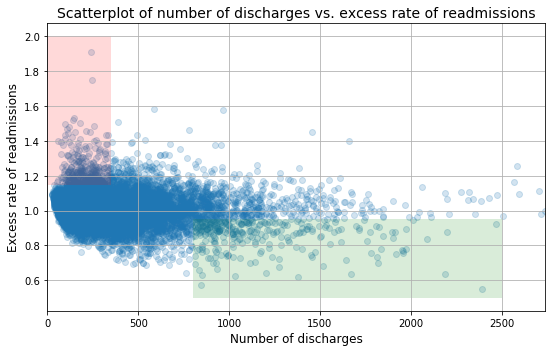

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
#QA.Do you agree with the above analysis and recommendations? Why or why not?

In [6]:
#The above analysis is weak, becuase it's only based on visually trend on the scatterplot. 
#There was no correlation coefficient or numerical evaluation calculated to confirm the initial observations.
# We need further study investigation and statistical analysis to determine whether 
#there is a significant correlation between hospital capacity (number of discharges) and readmission rates


In [7]:
#QB. Provide support for your arguments and your own recommendations with a statistically sound analysis:

#1.Setup an appropriate hypothesis test.

In [8]:
#Null Hypothesis::There is no statistically significant correlation between number of discharges and readmission rates.
#Alternative Hypothesis::There is a statistically significant negative correlation between number of discharges and readmission rates

In [9]:
#2.Compute and report the observed significance value (or p-value)

In [10]:
# conduct hypothesis test for pearson correlation coefficient
import scipy.stats as stats
corr,p_val = stats.pearsonr(x,y)
print('correlation coefficient:',corr)
print('p value =',p_val)


correlation coefficient: -0.0930955428759
p value = 1.50227564265e-23


In [11]:
#Report statistical significance for  αα  = .01.
#The Pearson correlation coefficient is -0.09, suggesting a negative but small correlation between the number of discharges and excess readmission ratio.
#The p-value of the correlation test is less than 1%, this is indeed statistically significant. 
#This means we can reject the null hypothesis, and the alternate hypothesis is more likely.
#There is a statistically significant negative correlation between number of discharges and readmission rates

In [12]:
#4.Discuss statistical significance and practical significance. 
#Do they differ here? How does this change your recommendation to the client?

In [13]:
#Statisical significant differences (i.e., reject the null hypothesis) means that differences in group means are not likely due to sampling error. 
#The problem is that statistically significant differences can be found even with very small differences if the sample size is large enough.
#Practical (or clinical) significance asks the larger question about differences
#Practical significance looks at whether the Pearson correlation is large enough to be a value that shows a significant relationship.
#It allows us to move beyond the simplistic, 'Does it work or not?' to the far more sophisticated, 'How well does it work in a range of contexts
#In this case, we have statistical signicance but not practical significance
#The p-value = 1.22 e-25, but the correlation coefficient (r = -0.097) is considered very small (aka "insignificant")

# This changes our recommendations,the above recommendation should not be followed. 
# We have to further analyze which feactures has a higher correlation with readmission rates.


In [14]:
#Q5.Look at the scatterplot above.
#What are the advantages and disadvantages of using this plot to convey information?
#Construct another plot that conveys the same information in a more direct manner

In [15]:
#Advantages of the scatter plot above are:
#display all of the data points, where the data points are concentrated, see the data trend

#Disadvantages of the scatter plot above are:
#When there are a large amount of data points in one area, the overlap between points makes it's hard to tell the relationship.


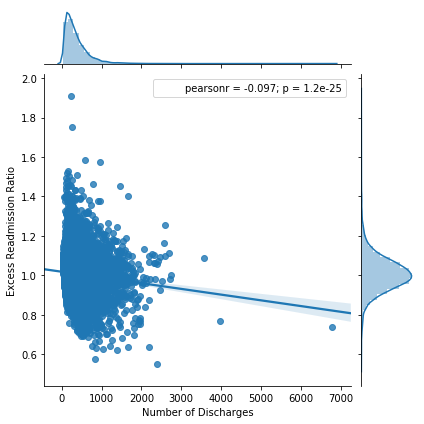

In [19]:
import seaborn as sns
discharges = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]['Number of Discharges']
readmission = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]['Excess Readmission Ratio']
sns.jointplot(discharges,readmission , kind='reg');

In [20]:
#Here, we use the join plot to conveys the same information in a more direct manner